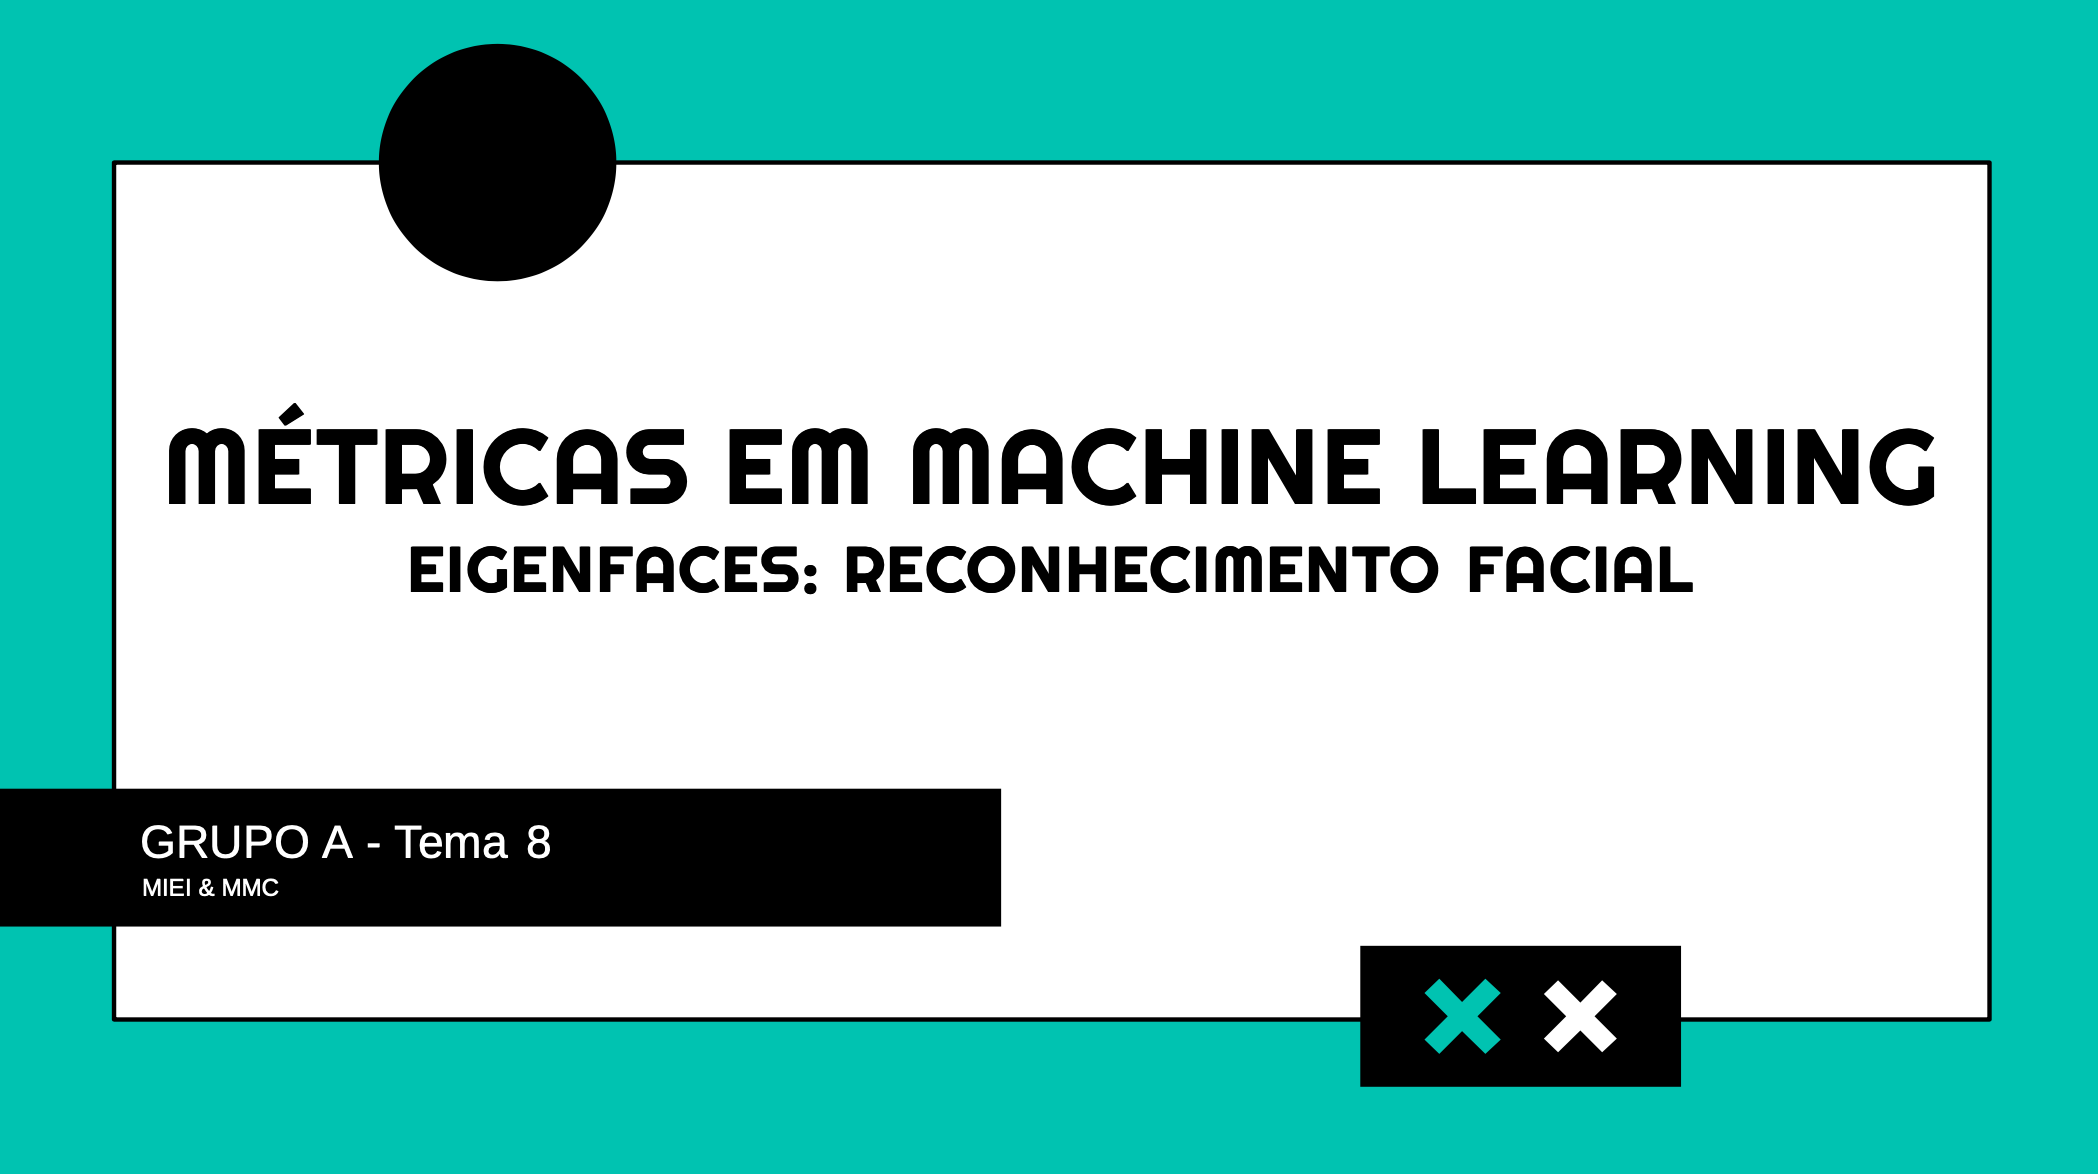

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

## Leitura das imagens de treino

* f é para usar as chavetas {} na string

* convert('L') é para tornas as fotografias greyscale (monocromático)

In [2]:
import glob
images = [glob.glob('yalefaces/ind{}/*'.format(pasta)) for pasta in range(1, 11)]

In [3]:
base = [Image.open(img).convert('L') for pasta in images for img in pasta]

#### "Chama" a imagem

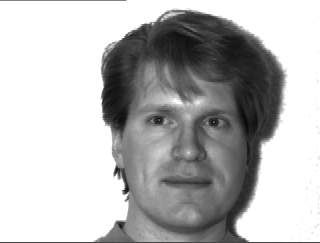

In [4]:
input_img = Image.open(f'yalefaces/ind1/subject01.gif').convert('L')
input_img

#### Saber a quantidade de fotografias que existem

In [5]:
M = len(base)
M

100

#### Gera uma lista de listas em que cada lista corresponde a uma imagem (0 a 399)

In [6]:
X = np.array([base[i].getdata() for i in range(M)])

#### Temos 400 listas em que cada uma 10304 elementos

In [7]:
print(X.shape)
X

(100, 77760)


array([[130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       ...,
       [130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68]])

## Centrar o X à média

In [8]:
media = np.mean(X, 0)
phi = X - media

In [9]:
media

array([122.23, 121.94, 122.55, ...,  68.  ,  68.  ,  68.  ])

In [10]:
phi.shape

(100, 77760)

## Matriz Covariância

* e_faces : vetores singulares
* sigma : valores singulares
* Não vamos usar o v pelo que metemos como "_"

In [11]:
e_faces, sigma, _ = np.linalg.svd(phi.transpose(), full_matrices = False)

In [12]:
e_faces.shape

(77760, 100)

In [13]:
sigma.shape

(100,)

In [14]:
len(phi)

100

In [15]:
e_faces

array([[-5.90000544e-04,  1.20959408e-03,  4.50993200e-05, ...,
         1.92266710e-03, -2.88776864e-03, -4.91864378e-03],
       [-8.79870403e-04,  1.38701569e-03,  6.31896222e-05, ...,
         4.78294136e-02,  1.67522783e-01,  1.27681199e-01],
       [-1.05401962e-03,  1.35524985e-03,  6.00629764e-06, ...,
        -1.35960543e-02, -1.35410919e-02, -4.01438314e-03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [16]:
# np.matmul(phi, phi.transpose())

#### Cálculo da covariância sem utilizar $\textit{SVD}$

In [17]:
Mc = np.cov(phi)

print('Mc: ', Mc.shape)

eigenValues, eigenVectors = np.linalg.eigh(Mc)

print('eigenVectors: ', eigenVectors.shape)

eV = np.dot(phi.transpose(), eigenVectors)

print(eV.shape)

Mc:  (100, 100)
eigenVectors:  (100, 100)
(77760, 100)


In [18]:
sum(np.diag(Mc))

383758.3945998277

In [19]:
traco2 = sum(eigenValues)  # == sum(np.diag(Mc))
traco2

383758.3945998276

## Cálculo dos valores próprios

#### Os valores singulares são a raiz de um valor próprio, logo:

In [20]:
val_prop = sigma*sigma
val_prop.shape

(100,)

#### Ordenar os valores próprios de forma decrescente

In [21]:
val_prop = np.sort(val_prop)

# o sort dá a lista ordenada crescentemente
# queremos decrescentemente, daí o ::-1

val_prop = val_prop[::-1]

In [22]:
'''
i = np.argsort(-eigenValues)
eigenValues = eigenValues[i]
eV = eV[:, i]
'''

'\ni = np.argsort(-eigenValues)\neigenValues = eigenValues[i]\neV = eV[:, i]\n'

#### Traço da matriz de dispersão (soma de todos valores próprios)

In [23]:
traco = sum(val_prop)
traco

33945729782.909977

## Componentes Principais - Elbow Plot

#### Calcular o $k$ consoante a confiança da soma dos k primeiros valores próprios.
* parar quando temos uma confiança mínima de 80%;
* parar quando começar a incrementar menos de 0.5% na confiança.

In [24]:
confianca_alvo = 0.85
k = 0
confianca = 0
confiancaAnt = 0

while confianca < confianca_alvo:
    confiancaAnt = confianca
    confianca = confianca + val_prop[k]/traco
    k += 1
    
    print('(confiança, valor próprio): ({0}, {1})'.format(confianca, k))
        
k, confianca

(confiança, valor próprio): (0.3240635086398956, 1)
(confiança, valor próprio): (0.4952175055610759, 2)
(confiança, valor próprio): (0.5998161998002414, 3)
(confiança, valor próprio): (0.6843819477209767, 4)
(confiança, valor próprio): (0.7198546337542329, 5)
(confiança, valor próprio): (0.7508741249435605, 6)
(confiança, valor próprio): (0.7786787454473534, 7)
(confiança, valor próprio): (0.8029380526398948, 8)
(confiança, valor próprio): (0.8212732668244527, 9)
(confiança, valor próprio): (0.8382094374335526, 10)
(confiança, valor próprio): (0.8510144933433734, 11)


(11, 0.8510144933433734)

In [25]:
'''
confianca_alvo = 0.85
k2 = 0
confianca = 0
confiancaAnt = 0

# o sort dá a lista ordenada crescentemente
# queremos decrescentemente, daí o ::-1
#eigenValues = eigenValues[::-1]

while confianca < confianca_alvo:
    confiancaAnt = confianca
    confianca = confianca + eigenValues[k2]/traco2
    k2 += 1
    
    print('(confiança, valor próprio): ({0}, {1})'.format(confianca, k2))
        
k2, confianca
'''

"\nconfianca_alvo = 0.85\nk2 = 0\nconfianca = 0\nconfiancaAnt = 0\n\n# o sort dá a lista ordenada crescentemente\n# queremos decrescentemente, daí o ::-1\n#eigenValues = eigenValues[::-1]\n\nwhile confianca < confianca_alvo:\n    confiancaAnt = confianca\n    confianca = confianca + eigenValues[k2]/traco2\n    k2 += 1\n    \n    print('(confiança, valor próprio): ({0}, {1})'.format(confianca, k2))\n        \nk2, confianca\n"

#### A escolha do $k$ baseou-se não só no cálculo da confiança, tal como na visualização do $\textit{elbow plot}$

Localização do $k$ no elbow plot (método do cotovelo)

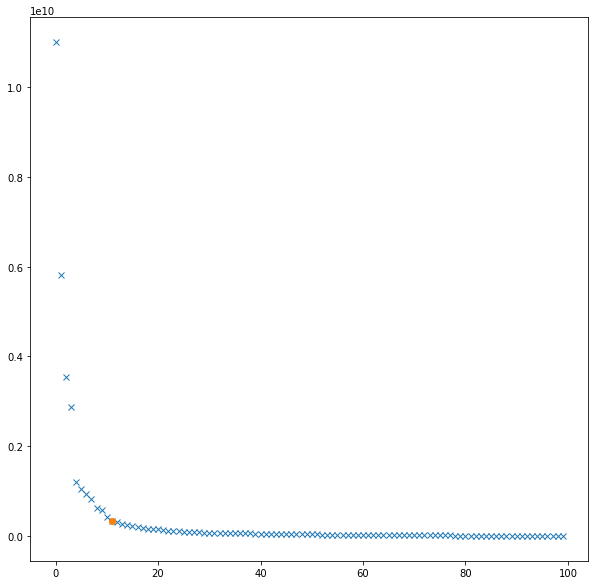

In [26]:
plt.figure(figsize = (10, 10))
t = np.arange(0, M, 1)
plt.plot(t, val_prop, 'x')
plt.plot(k, val_prop[k], 'o')
plt.show()

In [27]:
'''
k2 = 11

plt.figure(figsize = (10, 10))
t = np.arange(0, M, 1)
plt.plot(t, eigenValues, 'x')
plt.plot(k2, eigenValues[k2], 'o')
plt.show()
'''

"\nk2 = 11\n\nplt.figure(figsize = (10, 10))\nt = np.arange(0, M, 1)\nplt.plot(t, eigenValues, 'x')\nplt.plot(k2, eigenValues[k2], 'o')\nplt.show()\n"

#### Cálculo dos $k$ primeiros vetores próprios

In [28]:
newE_Faces = e_faces[:, 0:k]
newE_Faces

array([[-5.90000544e-04,  1.20959408e-03,  4.50993200e-05, ...,
         9.95769334e-04, -2.96132718e-04, -2.52036165e-04],
       [-8.79870403e-04,  1.38701569e-03,  6.31896222e-05, ...,
         1.02693298e-03,  1.99494661e-04, -5.85377552e-04],
       [-1.05401962e-03,  1.35524985e-03,  6.00629764e-06, ...,
         5.86293490e-04,  5.25908675e-04, -2.60914318e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [29]:
'''
newE_Faces = eV[:, 0:k2]
newE_Faces
'''

'\nnewE_Faces = eV[:, 0:k2]\nnewE_Faces\n'

## Projeção dos Dados

In [30]:
coef_proj = [np.dot(phi[i], newE_Faces) for i in range(M)]

#### Aplicação:

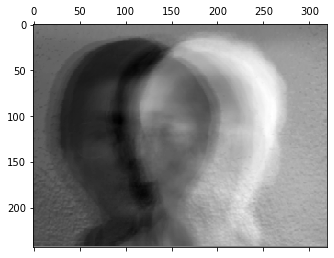

In [31]:
display(plt.matshow(np.reshape(newE_Faces.T[0], (243, 320)), cmap = 'gray'))

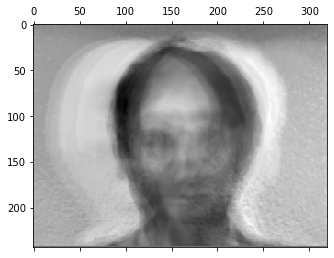

In [32]:
display(plt.matshow(np.reshape(newE_Faces.T[1], (243, 320)), cmap = 'gray'))

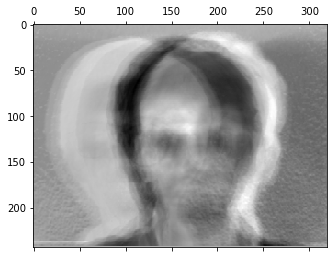

In [33]:
display(plt.matshow(np.reshape(newE_Faces.T[2], (243, 320)), cmap = 'gray'))

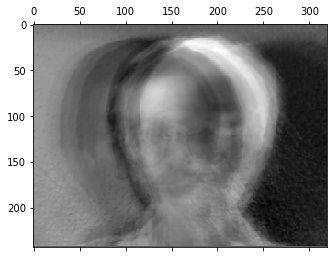

In [34]:
display(plt.matshow(np.reshape(newE_Faces.T[3], (243, 320)), cmap = 'gray'))

### Distância Euclidiana

In [35]:
def euclidian(coef_proj, test_coef_proj, M):
    dist = [np.linalg.norm(coef_proj[i] - test_coef_proj) for i in range(M)]
    return dist

### Distância Mahalanobis

In [36]:
def mahalanobis(coef_proj, test_coef_proj, val_prop, M):
    dist = [np.sum(np.divide(pow(coef_proj[i] - test_coef_proj, 2), val_prop)) for i in range(M)]
    return dist

## Reconhecimento facial

#### A função $\textit{recognition}$ indica se o reconhecimento é efetuado com sucesso ou se este falha consoante a distância mínima entre duas imagens da base de dados.

In [53]:
def recognition(dist, typeDist, limiteMaha, limiteEucl):
    d_min = np.min(dist)
    
    if typeDist == 'euclidian':
        limite = limiteEucl
    else:
        limite = limiteMaha
    
    if d_min < limite:
        # como temos 9 imagens por pasta
        pasta = int(np.floor(np.argmin(dist)/10)+1)
        print('Para a distância: ', typeDist)
        print('\tPasta ind'f'{pasta}\n\tdist = {d_min}')
        return 'ind' + str(pasta)
    else:
        print('Falhou no reconhecimento.')
        return 'Fail'

#### A função que se segue tem como objetivo identificar uma imagem de forma mais geral.

In [48]:
def identifyImage(img, typeDist, plot, limiteMaha, limiteEucl):    
    gamma = np.array(img.getdata())
    test_phi = gamma - media
    test_coef_proj = np.dot(test_phi, newE_Faces)
    
    if typeDist == 'euclidian':
        dist = euclidian(coef_proj, test_coef_proj, M)
    elif typeDist == 'mahalanobis':
        dist = mahalanobis(coef_proj, test_coef_proj, val_prop[:k], M)
    else:
        print('Something went wrong :(')
        return -1
    
    if plot == True:
        return test_coef_proj[0:2]
    else:
        return recognition(dist, typeDist, limiteMaha, limiteEucl) 

#### Exemplo de identificação do indivíduo 3

In [39]:
identifyImage(Image.open(f'yalefaces/teste/subject03.wink').convert('L'), 'mahalanobis', False, 3150, 0.03)

Para a distância:  mahalanobis
	Pasta ind3
	dist = 0.0018551110462934786


'ind3'

In [40]:
identifyImage(Image.open(f'yalefaces/teste/subject03.wink').convert('L'), 'euclidian', False, 3150, 0.03)

Falhou no reconhecimento.


'Fail'

#### Comparação da localização do indivíduo de teste (triângulo) em relação aos de treino

In [41]:
input_img = Image.open(f'yalefaces/teste/subject03.wink').convert('L')

Text(0, 0.5, 'Eigenface 2')

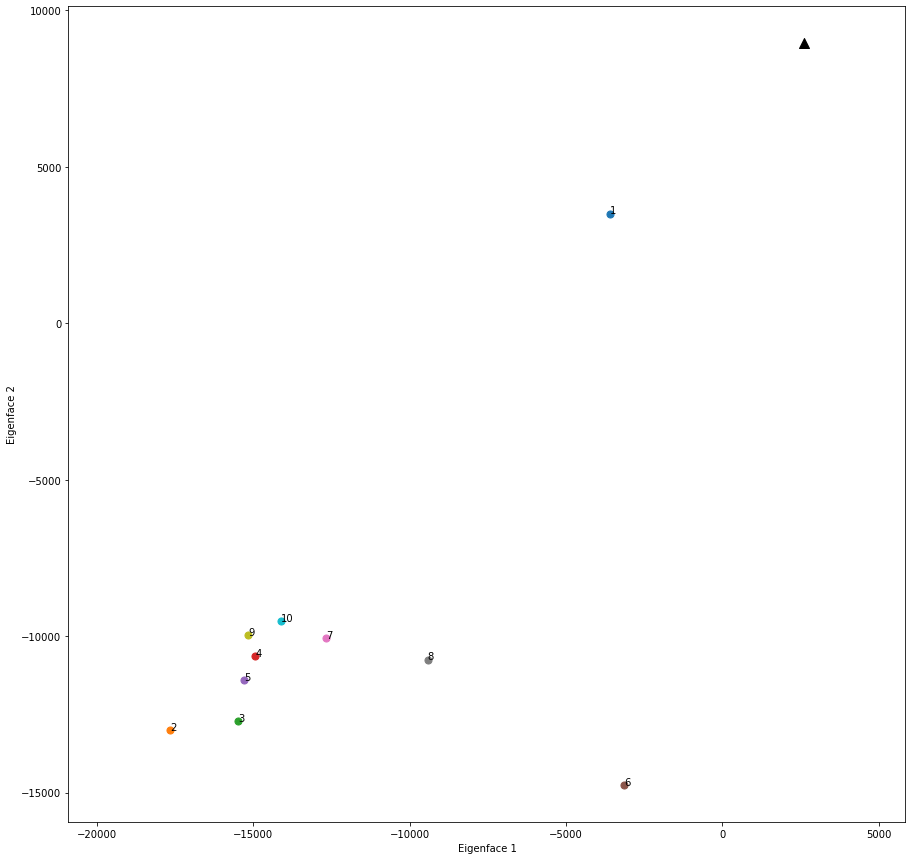

In [42]:
plt.figure(figsize = (15, 15))
plt.axis('equal')
for pasta in range(1, 11):
    images = glob.glob('yalefaces/ind{}/*'.format(pasta))
    images = images[3:4]
    imagens = [Image.open(img).convert('L') for img in images]
    x, y = np.array([identifyImage(pic, 'euclidian', True, 0.01, 3150) for pic in imagens]).T
    plt.scatter(x, y, s = 50)
    plt.text(x, y, pasta)
plt.scatter(*identifyImage(input_img, 'euclidian', True, 0.01, 3150), label = 'Input image',
            marker = '^', c = 'k', s = 100)
plt.xlabel('Eigenface 1')
plt.ylabel('Eigenface 2')

#### Função que determina o score para uma determinada métrica de distância

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

def getScore(distanceMetric, real):
    predictions = []
    
    images = glob.glob('yalefaces/teste/*')
    i = 0
    
    for image in images:
        predictions.append(identifyImage(
            Image.open(image).convert('L'),
            distanceMetric, False, 0.01, 3150))
        print('\treal person: ', realPersons[i], '\n')
        i += 1
        
    print(confusion_matrix(real, predictions))
    print(classification_report(real, predictions, digits = 3, zero_division = 0))

#### Identificação dos indivíduos de teste

In [44]:
realPersons = ['ind1', 'ind1', 'ind2', 'ind3', 'ind4', 'ind5', 'ind6',
               'ind7', 'ind8', 'ind9', 'ind10', 'Fail', 'Fail', 'Fail', 'Fail',
               'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
               'Fail', 'Fail', 'Fail', 'Fail','Fail', 'Fail', 'Fail', 'Fail']

## Score para Euclidiana

In [45]:
getScore('euclidian', realPersons)

Para a distância:  euclidian
	Pasta ind1
	dist = 1555.4030962683066
	real person:  ind1 

Para a distância:  euclidian
	Pasta ind1
	dist = 1662.018130319177
	real person:  ind1 

Para a distância:  euclidian
	Pasta ind2
	dist = 2679.5183194658284
	real person:  ind2 

Para a distância:  euclidian
	Pasta ind3
	dist = 1214.0592979938965
	real person:  ind3 

Para a distância:  euclidian
	Pasta ind4
	dist = 1308.8307999529713
	real person:  ind4 

Para a distância:  euclidian
	Pasta ind5
	dist = 626.2581170802194
	real person:  ind5 

Para a distância:  euclidian
	Pasta ind6
	dist = 1313.9690374606741
	real person:  ind6 

Para a distância:  euclidian
	Pasta ind7
	dist = 2139.320006002232
	real person:  ind7 

Falhou no reconhecimento.
	real person:  ind8 

Para a distância:  euclidian
	Pasta ind9
	dist = 3118.067885653877
	real person:  ind9 

Para a distância:  euclidian
	Pasta ind10
	dist = 1588.2538899703347
	real person:  ind10 

Falhou no reconhecimento.
	real person:  Fail 

Falhou

## Score para Mahalanobis

In [46]:
getScore('mahalanobis', realPersons)

Para a distância:  mahalanobis
	Pasta ind1
	dist = 0.001262126718371104
	real person:  ind1 

Para a distância:  mahalanobis
	Pasta ind1
	dist = 0.0026825548815732157
	real person:  ind1 

Para a distância:  mahalanobis
	Pasta ind2
	dist = 0.0070832294457229515
	real person:  ind2 

Para a distância:  mahalanobis
	Pasta ind3
	dist = 0.0018551110462934786
	real person:  ind3 

Para a distância:  mahalanobis
	Pasta ind4
	dist = 0.002173442452423218
	real person:  ind4 

Para a distância:  mahalanobis
	Pasta ind5
	dist = 0.00032416412451060056
	real person:  ind5 

Para a distância:  mahalanobis
	Pasta ind6
	dist = 0.0019790895434516976
	real person:  ind6 

Para a distância:  mahalanobis
	Pasta ind7
	dist = 0.006591990956872196
	real person:  ind7 

Falhou no reconhecimento.
	real person:  ind8 

Para a distância:  mahalanobis
	Pasta ind9
	dist = 0.006284386617213485
	real person:  ind9 

Para a distância:  mahalanobis
	Pasta ind10
	dist = 0.0022792463791310703
	real person:  ind10 

Fal

#### Determinar o limite superior da Euclidiana

In [49]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score

parameters = {
    'limiteEucl': range(2400, 3500, 50),
    'limiteMaha': [0.0]
}

combinations = list(ParameterGrid(parameters))

bestScore = 0.0
bestCombination = {}

for i in combinations:
    
    predictions = []
    
    images = glob.glob('yalefaces/teste/*')
    ind = 0
    
    for image in images:
        predictions.append(identifyImage(
            Image.open(image).convert('L'),
            'euclidian', False, i['limiteMaha'], i['limiteEucl']))
        ind += 1
    
    if bestScore < accuracy_score(realPersons, predictions):
        bestScore = accuracy_score(realPersons, predictions)
        bestCombination = i

In [50]:
print('\t{}\n\t{}'.format(bestCombination, bestScore))

	{'limiteEucl': 3150, 'limiteMaha': 0.0}
	0.967741935483871


#### Determinar limite superior na Mahalanobis

In [51]:
parameters = {
    'limiteEucl': [0.0],
    'limiteMaha': np.arange(0.01, 0.08, 0.005)
}

combinations = list(ParameterGrid(parameters))

bestScore = 0.0
bestCombination = {}
    
for i in combinations:
    
    predictions = []
    
    images = glob.glob('yalefaces/teste/*')
    ind = 0
    
    for image in images:
        predictions.append(identifyImage(
            Image.open(image).convert('L'),
            'mahalanobis', False, i['limiteMaha'], i['limiteEucl']))
        ind += 1
    
    if bestScore < accuracy_score(realPersons, predictions):
        bestScore = accuracy_score(realPersons, predictions)
        bestCombination = i

In [52]:
print('\t{}\n\t{}'.format(bestCombination, bestScore)) 

	{'limiteEucl': 0.0, 'limiteMaha': 0.01}
	0.967741935483871
